<a href="https://colab.research.google.com/github/marcosvnespolo/Portfolio/blob/main/Previs%C3%A3o_de_Vendas_com_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto Ciência de Dados - Previsão de Vendas

*   Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
*   Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importando e entendendo os dados

In [3]:
tabela = pd.read_csv('/content/drive/MyDrive/Intensivão de Python/Aula 4/advertising.csv')
display(tabela)
# Exemplo de leitura ta tabela: na linha 0 (primeiro mês) foram gastos em anúncios 230,1 mil reais na TV, 37,8 mil reais no Rádio e 69,2 mil reais no Jornal 
# e foram arrecadados em vendas 22,1 milhões de reais

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


# Análise exploratória

- Visualizar como as informações de cada item estão distribuídas
- Avaliar a correlação entre cada um dos itens

In [5]:
display(tabela.corr())


,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


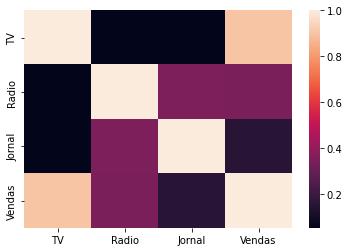

In [6]:
# Podemos utilizar a biblioteca seaborn para melhorar a visualização
# criar gráfico
sns.heatmap(tabela.corr())
# exibir o gráfico
plt.show()

 Para melhorar a visualização, podemos utilizar o parâmetro cmap do matplotlib
 disponivel em: https://seaborn.pydata.org/generated/seaborn.heatmap.html

 para alterar a paleta de cores, acessar: 
 
 https://matplotlib.org/stable/tutorials/colors/colormaps.html

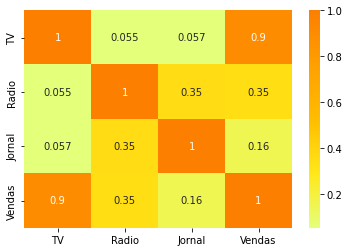

In [7]:
sns.heatmap(tabela.corr(), cmap='Wistia', annot=True) # o parâmetro "cmap" muda a paleta de cores
# e o parâmetro "annot" exibe os valores correspondentes da tabela em cada campo do gráfico

plt.show()

# Preparação dos dados para o modelo

In [48]:
# Separando dados de treino e de teste

# y -> quem eu quero prever (vendas)
# x -> todo o resto (quem eu vou usar para fazer a previsão)

x = tabela[['TV', 'Radio', 'Jornal']]
y = tabela['Vendas']

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3) # O parâmetro "test_size" nos diz o tamanho dos dados de teste
# neste caso, 30%

**Temos um modelo de regressão - Vamos escolher os modelos utilizados**

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [49]:
# Passo 1: Importar a inteligência artificaial
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Passo 2: Criar a inteligência artificial
modelo_regressaolinear = LinearRegression()
modelo_arvoradecisao = RandomForestRegressor()

# Passo 3: Treinar a inteligência artificial
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoradecisao.fit(x_treino, y_treino)

RandomForestRegressor()

**Testando a AI e avaliando o melhor modelo**

- Através da utilização do R² podemos prever o % em que o modelo consegue explicar o que acontece

In [50]:
# Fazer previsão nos testes

previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoradecisao = modelo_arvoradecisao.predict(x_teste)

from sklearn.metrics import r2_score

print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste, previsao_arvoradecisao))

0.8946665078491243
0.9357356996364928


# Conclusão

- O modelo Random Forest obteve melhor acurácia em relação ao modelo de regressão linear, desta forma, este será o modelo escolhido para futuras previsões


In [51]:
# Realizando uma nova previsão

novos = pd.read_csv('/content/drive/MyDrive/Intensivão de Python/Aula 4/novos.csv')
novos

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [53]:
print( modelo_arvoradecisao.predict(novos))

[ 7.85   8.331 20.232]


Ou seja, se no primeiro mês, investirmos 23,1 mil em TV, 3,8 mil em Radio e 69,2 mil em jornal, teremos um retorno de 7,85 milhoes, e assim por diante...

É interessanteobjervar também que a correlação entre TV e vendas é reforçada na previsão, pois no mes 3 (linha2), com investimento de 170,2 mil em TV, 45,9 mil e Rádio e nenhum investimento em jornal foi obtido a maior taxa de vendas, de 20,232 milhões!!